### 유방암 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# 데이터 확인 및 전처리

In [6]:
df_raw = pd.read_csv("rawdata/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 결측치 검측

In [4]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

# 범주형 변수 확인

In [7]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

# 더미 변수 생성

# 트레인 세트와 테스트 세트 + 검증 세트 구분

In [12]:
df_test, df_train = train_test_split(df_raw, test_size = 0.4, random_state = 42)
print("Train data size\t: {}".format(df_train.shape))
print("Test data size\t: {}".format(df_test.shape))

Train data size	: (228, 31)
Test data size	: (341, 31)


In [13]:
df_valid, df_test = train_test_split(df_test, test_size = 0.5, random_state = 42)
print("Train data size\t: {}".format(df_valid.shape))
print("Test data size\t: {}".format(df_test.shape))

Train data size	: (170, 31)
Test data size	: (171, 31)


# 세트들을 종속변수 (y) 와 독립변수 (x) 로 구분

In [17]:
df_train_x = df_train.drop(["diagnosis"], axis = 1)
df_train_y = df_train[["diagnosis"]]
df_test_x = df_test.drop(["diagnosis"], axis = 1)
df_test_y = df_test[["diagnosis"]]
df_valid_x = df_valid.drop(["diagnosis"], axis = 1)
df_valid_y = df_valid[["diagnosis"]]

# 2) 모델생성

# 파라미터 튜닝

## Depth

In [20]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range (1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [24]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.961,0.895
1,2,0.965,0.889
2,3,0.987,0.930
3,4,1.000,0.906
4,5,1.000,0.906
5,6,1.000,0.906
6,7,1.000,0.906
7,8,1.000,0.906
8,9,1.000,0.906
9,10,1.000,0.906


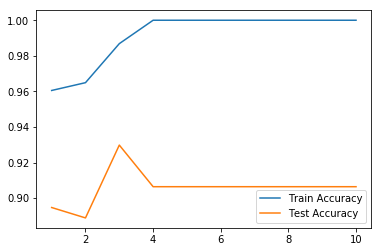

In [25]:
plt.plot(para_depth, train_accuracy, linestyle='-',label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle='-',label="Test Accuracy")
plt.legend()

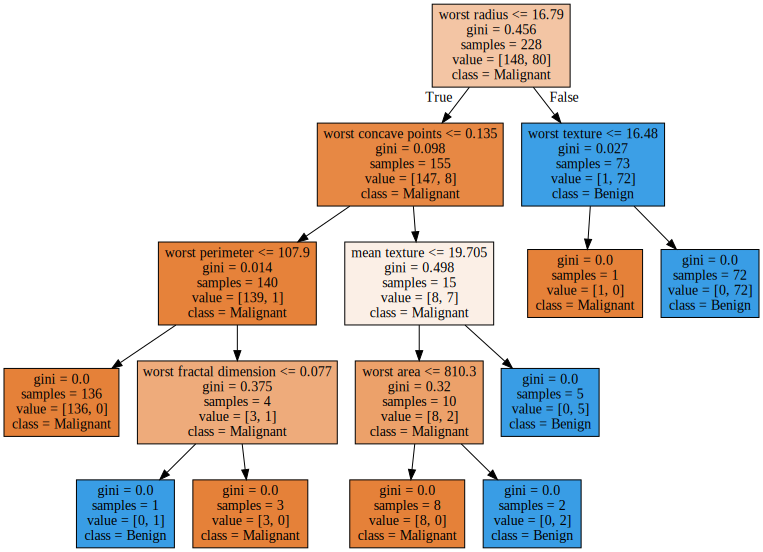

In [69]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier (max_depth = 4, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Malignant", "Benign"],
                feature_names = v_feature_name, impurity = True, filled = True) 

with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))


# 분리 노드 최소 자료 수 min_sample_split

In [39]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range (1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,
                                 max_depth = 4, random_state = 42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [40]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.996,0.924
1,20,0.965,0.895
2,30,0.965,0.895
3,40,0.965,0.895
4,50,0.965,0.895
5,60,0.965,0.895
6,70,0.965,0.895
7,80,0.961,0.895
8,90,0.961,0.895
9,100,0.961,0.895


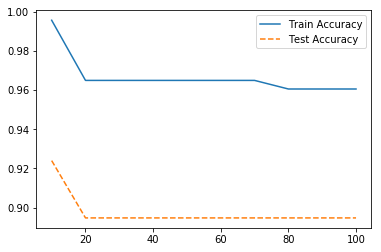

In [41]:
plt.plot(para_split, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.legend()

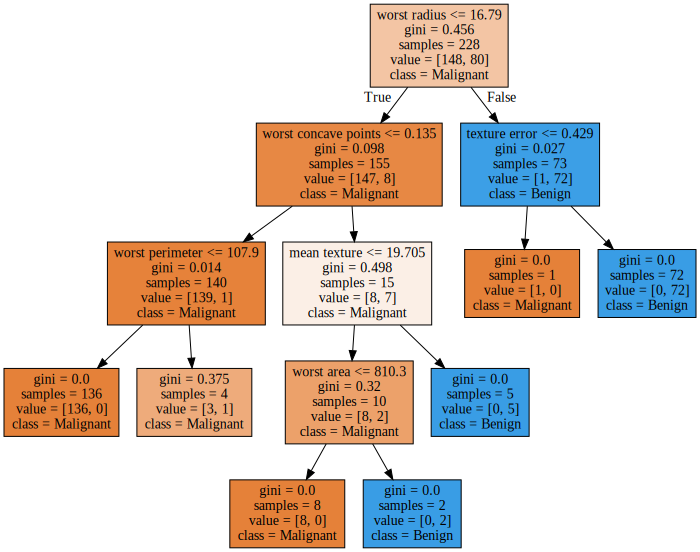

In [70]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier (max_depth = 4, min_samples_split = 10, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Malignant", "Benign"],
                feature_names = v_feature_name, impurity = True, filled = True) 

with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## 최소 잎새수 min_samples_leaf

In [62]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range (1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 10, 
                                  max_depth = 4, random_state = 42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [63]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.991,0.930
1,4,0.982,0.930
2,6,0.982,0.912
3,8,0.961,0.895
4,10,0.961,0.895
5,12,0.961,0.895
6,14,0.961,0.895
7,16,0.961,0.895
8,18,0.961,0.895
9,20,0.961,0.895


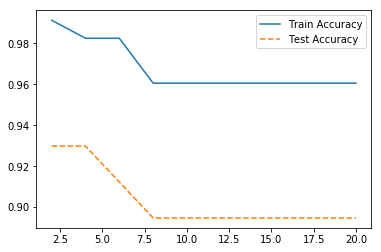

In [64]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.legend()

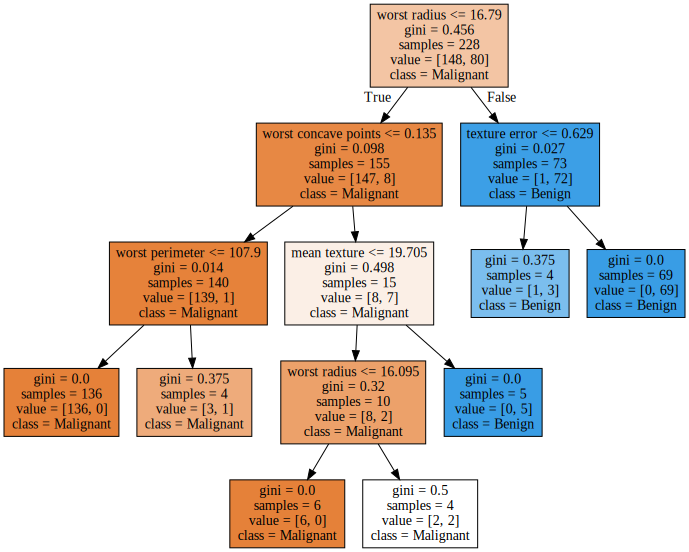

In [72]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier (max_depth = 4, min_samples_split = 10, 
                                   min_samples_leaf = 4, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Malignant", "Benign"],
                feature_names = v_feature_name, impurity = True, filled = True) 

with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 최종 모델 선정

In [106]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, min_samples_leaf = 4, random_state = 42)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

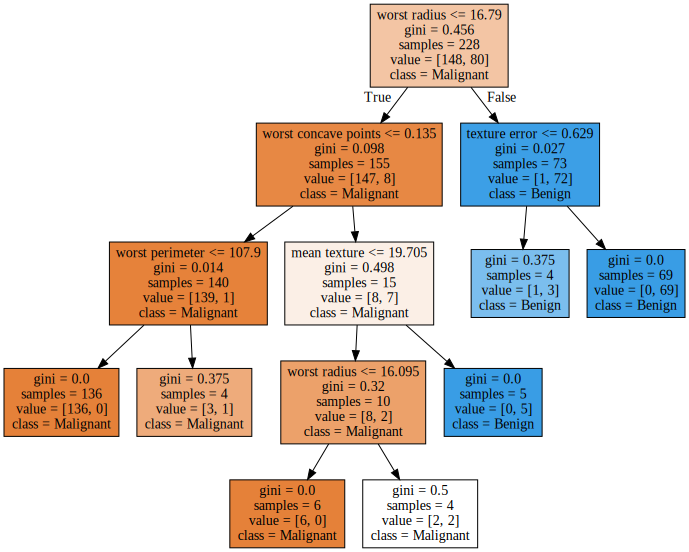

In [107]:
    export_graphviz(tree_final, out_file = "tree_final.dot", class_names =["Malignant", "Benign"],
                    feature_names = v_feature_name, impurity = True, filled = True) 

    with open("tree_final.dot") as f:
        dot_graph = f.read()

    display(graphviz.Source(dot_graph))

In [108]:
y_pred = tree_final.predict(df_test_x)
print("Test set accuracy: %.3f" % tree_final.score(df_test_x, df_test_y))
cfm = confusion_matrix(df_test_y, y_pred)
print("Confusion matirx\n{}".format(cfm))

y_pred = tree_final.predict(df_valid_x)
print("Valid set accuracy: %.3f" % tree_final.score(df_valid_x, df_valid_y))
print("Confusion matirx\n{}".format(confusion_matrix(df_valid_y, y_pred)))


Test set accuracy: 0.930
Confusion matirx
[[96  7]
 [ 5 63]]
Valid set accuracy: 0.941
Confusion matirx
[[101   5]
 [  5  59]]


In [109]:
df_importance = pd.DataFrame()
df_importance["feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,feature,Importance
20,worst radius,0.889
27,worst concave points,0.058
1,mean texture,0.043
22,worst perimeter,0.005
11,texture error,0.005
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000


Text(0, 0.5, '설명번수')

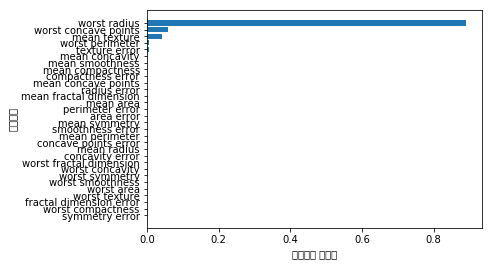

In [113]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명번수")

# GridSearchCV로 최적 파라미터 찾기

In [102]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_df = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_df.fit(df_train_x, df_train_y)

print("Best estimator model: \n{}".format(grid_df.best_estimator_))
print("\nBest parameter: \n{}".format(grid_df.best_params_))
print("\nBest Score: {}".format(grid_df.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best parameter: 
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}

Best Score: 0.934


In [105]:
tree_final = DecisionTreeClassifier(max_depth = 2, min_samples_split = 10, min_samples_leaf = 2, random_state = 42)
tree_final.fit(df_train_x, df_train_y)

y_pred = tree_final.predict(df_test_x)
print("Test set accuracy: %.3f" % tree_final.score(df_test_x, df_test_y))
y_pred = tree_final.predict(df_valid_x)
print("Valid set accuracy: %.3f" % tree_final.score(df_valid_x, df_valid_y))


Test set accuracy: 0.889
Valid set accuracy: 0.894


# 해석

트리 분리에 영향을 미치는 변수: 
- worst radius
- concave point
- texture error